In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [11]:
import sqlite3

conn = sqlite3.connect("../db.sqlite3")

orders_df = pd.read_sql_query("SELECT * FROM restaurant_order", conn)
order_items_df = pd.read_sql_query("SELECT * FROM restaurant_orderitem", conn)
products_df = pd.read_sql_query("SELECT * FROM restaurant_product", conn)


combined_df = pd.merge(order_items_df, orders_df, left_on="order_id", right_on="id", suffixes=('_item', '_order'))

combined_df = pd.merge(combined_df, products_df, left_on="product_id", right_on="id", suffixes=('', '_product'))

combined_df = combined_df[["id_order", "datetime", "quantity", "product_id", "name", "price"]]
combined_df.columns = ["order_id", "datetime", "quantity", "product_id", "product_name", "product_price"]

combined_df.to_csv("combined_data.csv", index=False)

conn.close()

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

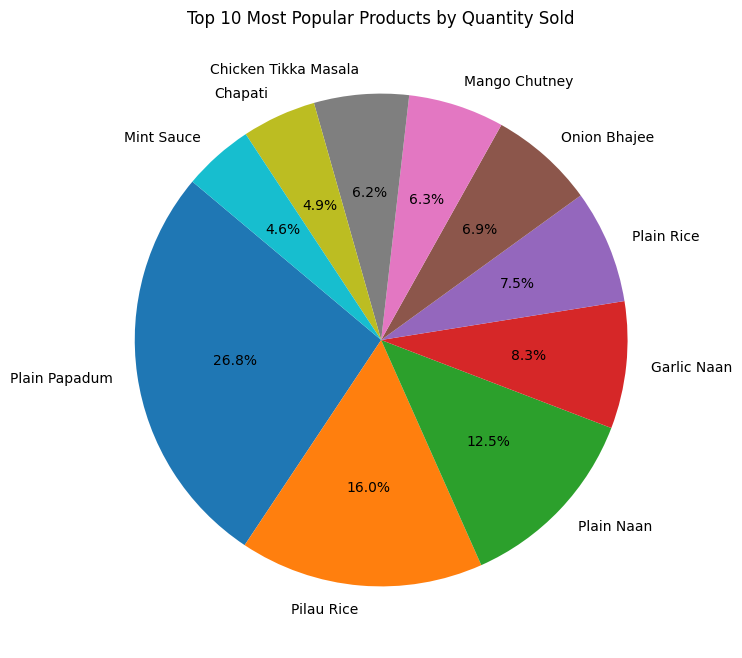

In [18]:
import matplotlib.pyplot as plt

df = pd.read_csv("combined_data.csv")

top_products = df.groupby("product_name")["quantity"].sum().nlargest(10)

plt.figure(figsize=(8, 8))
top_products.plot.pie(autopct='%1.1f%%', startangle=140)

plt.title("Top 10 Most Popular Products by Quantity Sold")
plt.ylabel("")

plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

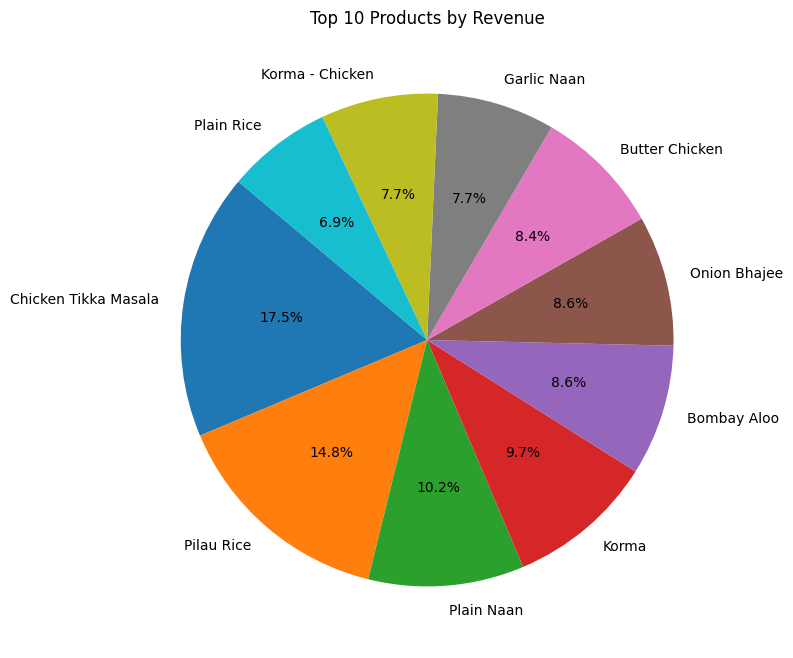

In [19]:
df["item_price"] = df["product_price"] * df["quantity"]
top_products_by_revenue = df.groupby("product_name")["item_price"].sum().nlargest(10)

plt.figure(figsize=(8, 8))
top_products_by_revenue.plot.pie(autopct='%1.1f%%', startangle=140)

plt.title("Top 10 Products by Revenue")
plt.ylabel("")

plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

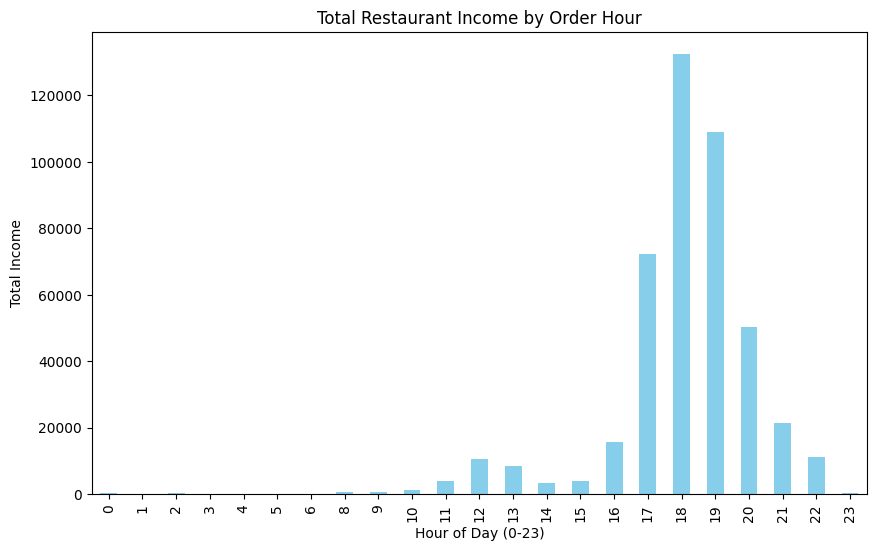

In [21]:
df["order_hour"] = pd.to_datetime(df["datetime"]).dt.hour
income_by_hour = df.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(10, 6))
income_by_hour.plot.bar(color="skyblue")

plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Total Income")

plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

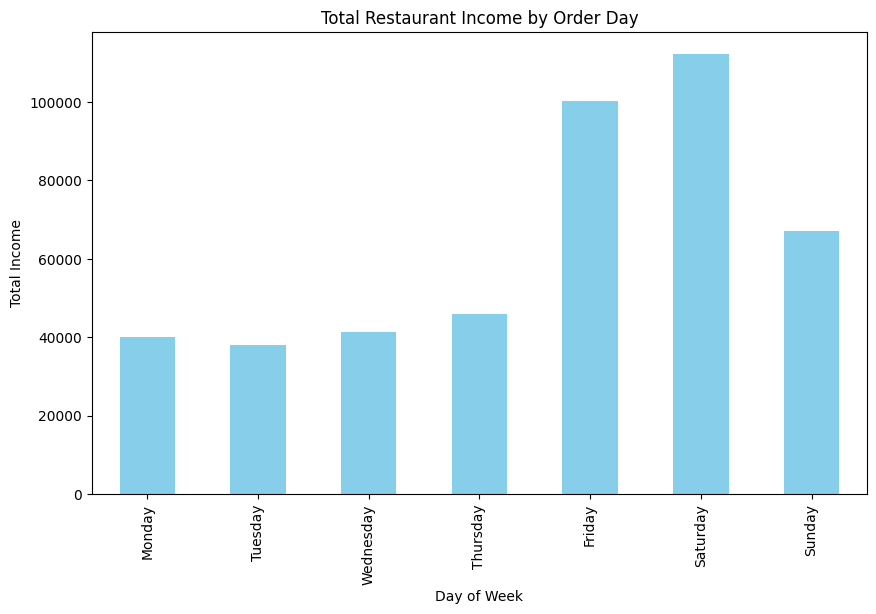

In [23]:
df["order_day"] = pd.to_datetime(df["datetime"]).dt.dayofweek
income_by_day = df.groupby("order_day")["item_price"].sum()

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(10, 6))
income_by_day.plot.bar(color="skyblue")

plt.title("Total Restaurant Income by Order Day")
plt.xlabel("Day of Week")
plt.ylabel("Total Income")

plt.xticks(ticks=range(7), labels=days_of_week)

plt.show()